In [172]:
import pandas as pd
import os
%matplotlib inline

In [173]:
experiment_dir = "odsc_west_2018_20181028-192702/"
make_path = lambda x: os.path.join(experiment_dir,x)

In [174]:
lookback = pd.read_csv(make_path("lookback.csv"))

In [175]:
lookback

,average_delay,average_expected_number_obs,average_num_obs_difference,delay_intensity_s,delay_type,frequency_s,frequency_type,lookback_s,max_delay,max_num_obs_difference,percent_points_missed,periodicity_s,rmse_delay,rmse_difference,rmse_no_delay,sensitive
0,10.660150,2.082,0.284,10,ExponentialDelayer,0.1,PoissonProcess,1,76.367810,2,13.640730,10.0,2.353712,2.067116,0.286596,False
1,9.737613,2.170,0.284,10,ExponentialDelayer,0.1,PoissonProcess,2,55.355083,3,13.087558,10.0,2.572426,2.274272,0.298154,False
2,9.397757,2.508,0.346,10,ExponentialDelayer,0.1,PoissonProcess,5,94.108617,3,13.795853,10.0,2.361670,2.070766,0.290904,False
3,9.554848,2.940,0.322,10,ExponentialDelayer,0.1,PoissonProcess,10,57.959571,4,10.952381,10.0,1.654942,1.372217,0.282725,False
4,9.996262,4.090,0.456,10,ExponentialDelayer,0.1,PoissonProcess,20,71.765033,4,11.149144,10.0,1.394348,1.114320,0.280028,False
5,10.355936,5.136,0.558,10,ExponentialDelayer,0.1,PoissonProcess,30,54.174307,5,10.864486,10.0,1.196854,0.905588,0.291266,False
6,9.798591,7.976,0.486,10,ExponentialDelayer,0.1,PoissonProcess,60,59.572106,4,6.093280,10.0,0.744578,0.452758,0.291820,False
7,10.562082,13.122,0.502,10,ExponentialDelayer,0.1,PoissonProcess,120,67.323513,5,3.825636,10.0,0.479771,0.191480,0.288291,False
8,10.117411,31.336,0.476,10,ExponentialDelayer,0.1,PoissonProcess,300,72.296469,4,1.519020,10.0,0.376041,0.085799,0.290242,False
9,9.986619,58.504,0.438,10,ExponentialDelayer,0.1,PoissonProcess,600,57.674060,3,0.748667,10.0,0.306451,0.012478,0.293973,False


Text(0.5, 0, 'Lookback (sec)')

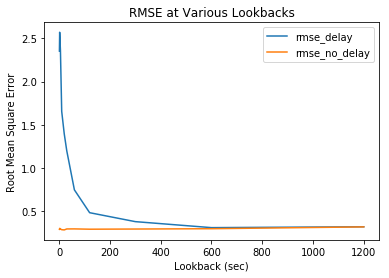

In [176]:
plt = lookback.plot(x = "lookback_s", title="RMSE at Various Lookbacks",y=["rmse_delay","rmse_no_delay"])
plt.set_ylabel("Root Mean Square Error")
plt.set_xlabel("Lookback (sec)")

In [177]:
sensitivities = pd.read_csv(make_path("sensitivities.csv"))

Text(0.5, 0, 'Model Sensitivity')

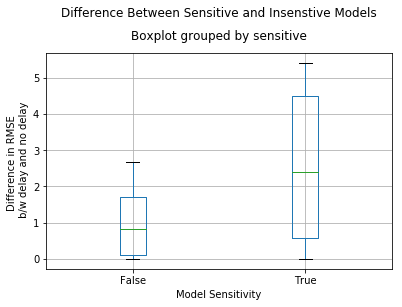

In [178]:
plt = sensitivities.boxplot(by = "sensitive", column = "rmse_difference")
plt.set_title("Difference Between Sensitive and Insenstive Models\n\n")
plt.set_ylabel("Difference in RMSE \n b/w delay and no delay")
plt.set_xlabel("Model Sensitivity")

In [179]:
delays = pd.read_csv(make_path("delay.csv"))

Text(0, 0.5, 'RMSE')

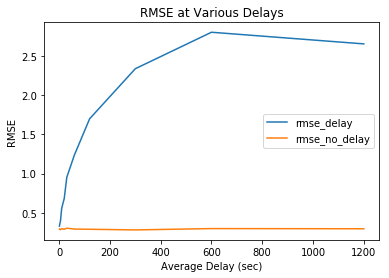

In [180]:
plt = delays.plot(x = "delay_intensity_s", y=["rmse_delay","rmse_no_delay"],title = "RMSE at Various Delays")
plt.set_xlabel(xlabel="Average Delay (sec)")
plt.set_ylabel(ylabel="RMSE")

In [181]:
frequencies = pd.read_csv(make_path("frequencies.csv"))

Text(0, 0.5, 'RMSE')

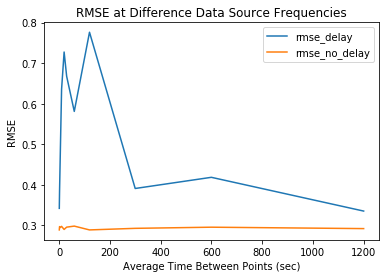

In [182]:
plt = frequencies.plot(x = "periodicity_s", y=['rmse_delay','rmse_no_delay'],title = "RMSE at Difference Data Source Frequencies")
plt.set_xlabel("Average Time Between Points (sec)")
plt.set_ylabel("RMSE")

In [183]:
frequencies

,average_delay,average_expected_number_obs,average_num_obs_difference,delay_intensity_s,delay_type,frequency_s,frequency_type,lookback_s,max_delay,max_num_obs_difference,percent_points_missed,periodicity_s,rmse_delay,rmse_difference,rmse_no_delay,sensitive
0,10.011356,106.258,5.372,10,ExponentialDelayer,1.000000,PoissonProcess,100,57.666464,16,5.055619,1.0,0.342194,0.053078,0.289116,False
1,9.998457,51.570,2.528,10,ExponentialDelayer,0.500000,PoissonProcess,100,57.477418,10,4.902075,2.0,0.383324,0.086081,0.297243,False
2,9.768130,21.968,0.966,10,ExponentialDelayer,0.200000,PoissonProcess,100,55.575197,6,4.397305,5.0,0.478984,0.183990,0.294994,False
3,10.079735,11.914,0.514,10,ExponentialDelayer,0.100000,PoissonProcess,100,66.114251,4,4.314252,10.0,0.635421,0.337622,0.297799,False
4,10.212198,6.920,0.266,10,ExponentialDelayer,0.050000,PoissonProcess,100,78.785359,3,3.843931,20.0,0.727375,0.437147,0.290228,False
5,9.662705,5.224,0.138,10,ExponentialDelayer,0.033333,PoissonProcess,100,75.177252,2,2.641654,30.0,0.667586,0.371698,0.295887,False
6,10.002750,3.598,0.068,10,ExponentialDelayer,0.016667,PoissonProcess,100,91.079865,2,1.889939,60.0,0.581045,0.282583,0.298462,False
7,9.852632,2.858,0.036,10,ExponentialDelayer,0.008333,PoissonProcess,100,98.337919,2,1.259622,120.0,0.776107,0.487039,0.289068,False
8,9.366174,2.296,0.006,10,ExponentialDelayer,0.003333,PoissonProcess,100,57.658622,1,0.261324,300.0,0.391157,0.098202,0.292955,False
9,10.309957,2.160,0.014,10,ExponentialDelayer,0.001667,PoissonProcess,100,72.239601,2,0.648148,600.0,0.418663,0.122891,0.295772,False


## Interactions

In [184]:
import numpy as np
import matplotlib.pyplot as plt
def make_contour_plot(df,levels,title):
    pivoted = df.pivot_table(index="periodicity_s",
                             columns=["delay_intensity_s"],
                             values="rmse_difference",
                             aggfunc='mean')
    X = pivoted.columns.values
    Y = pivoted.index.values
    Z = pivoted.values
    x,y = np.meshgrid(X, Y)
    mesh = plt.contourf(x, y, Z,levels=levels)
    mesh.ax.set_xlabel("Delay Intensity (s)")
    mesh.ax.set_ylabel("Average Time Between Points (s)")
    mesh.ax.set_title(title)
    plt.colorbar(mesh)
    return mesh

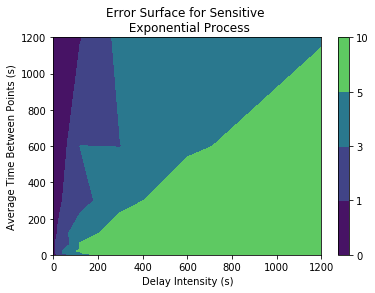

In [185]:
interactions = pd.read_csv(make_path("interaction.csv"))
make_contour_plot(interactions[interactions["sensitive"] == True],
                  levels=[0,1,3,5,10],
                  title = "Error Surface for Sensitive \n Exponential Process")

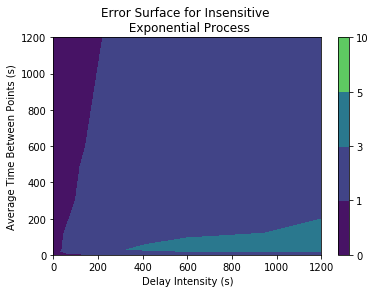

In [186]:
make_contour_plot(interactions[interactions["sensitive"] == False],
                  levels=[0,1,3,5,10],
                  title = "Error Surface for Insensitive \n Exponential Process")

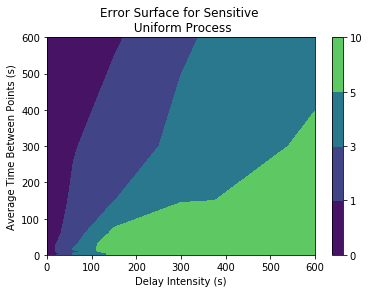

In [187]:
interaction_uniform = pd.read_csv(make_path("interaction_uniform.csv"))
make_contour_plot(interaction_uniform[interaction_uniform["sensitive"] == True],
                  levels=[0,1,3,5,10],
                  title = "Error Surface for Sensitive \n Uniform Process")

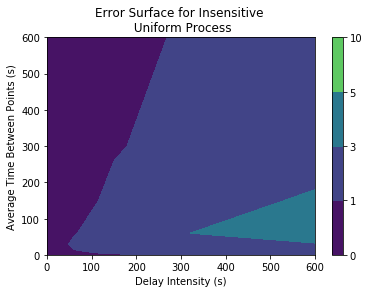

In [188]:
make_contour_plot(interaction_uniform[interaction_uniform["sensitive"] == False],
                  levels=[0,1,3,5,10],
                  title = "Error Surface for Insensitive \n Uniform Process")

In [189]:
freq_vs_lookback = pd.read_csv(make_path("freq_vs_lookback.csv"))
freq_vs_lookback["freq*lookback"] = freq_vs_lookback["frequency_s"]* freq_vs_lookback["lookback_s"]

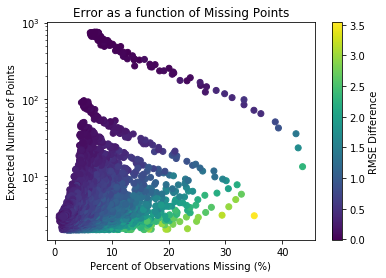

In [216]:
import matplotlib.pyplot as plt
df = freq_vs_lookback[freq_vs_lookback["delay_intensity_s"]==100]
fig, ax = plt.subplots(1, 1)
plot = ax.scatter(x = df["percent_points_missed"],
                   y = df["average_expected_number_obs"],
                   c = df["rmse_difference"])
plot.axes.set_title("Error as a function of Missing Points")
plot.axes.set_ylabel("Expected Number of Points")
plot.axes.set_xlabel("Percent of Observations Missing (%)")
plot.axes.set_yscale("log", nonposy='clip')
fig.colorbar(plot,label = "RMSE Difference")

In [ ]:
freq_vs_lookback